# California Housing Price 
reference : exercise in chapter 2 of 'Hands-On Machine Learning with Scikit-learn and Tensorflow' by Aurélien Géron. 

##### Tip> shortcuts for Jupyter Notebook
* Ctrl + Enter : run cell
* Shift + Enter : run cell and select below

## 0. Numpy and Pandas

### - Numpy
A python library that supports for large, multi-dimensional arrays and matrices

<script src="https://npmcdn.com/jupyter-js-widgets@~1.2.0/dist/embed.js"></script><img src='https://www.oreilly.com/library/view/elegant-scipy/9781491922927/assets/elsp_0105.png'><script type="application/vnd.jupyter-embedded-widgets">{}</script>

In [30]:
import numpy as np

In [31]:
py_arr = [1,2,3,4,5,6]
py_arr

[1, 2, 3, 4, 5, 6]

In [32]:
type(py_arr)

list

In [33]:
py_arr+5 # error

TypeError: ignored

In [ ]:
py_arr*2

In [ ]:
np_arr = np.array([1,2,3,4,5,6])
np_arr

In [ ]:
type(np_arr)

In [ ]:
np_arr+5

In [ ]:
np_arr*2

In [ ]:
np_arr = np.empty((5,2)) # Create some dimension of numpy array easily with random numbers
np_arr

In [ ]:
np_arr = np.zeros((5,2)) # Create some dimension of numpy array easily with zero
np_arr

In [ ]:
np_arr_1 = np.array([[1, 2, 3, 4], 
                   [5, 6, 7, 8], 
                   [9, 10, 11, 12]]) # multi-dimensional array
np_arr_1

In [ ]:
np_arr_1 * [1,2,3,4] # simple matrix multiplication

### - Pandas

A python library for data manipulation and analysis.

Pandas has two data structures.
One is Series and the other is DataFrame.

    Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.)

    Dataframe is two-dimensional size-mutable data structure with labeled axes (rows and columns)

In [34]:
import pandas as pd

In [35]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [36]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [37]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [38]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [39]:
df.columns

Index(['one', 'two'], dtype='object')

In [40]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [41]:
df['three'] = df['one'] * df['two']

In [42]:
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [43]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [44]:
df.iloc[0,1]

111.0

In [45]:
df.loc["apple"]

one        100
two        111
three    11100
flag     False
Name: apple, dtype: object

In [46]:
df.loc["apple"][0]

100.0

In [47]:
df.loc["apple"]["one"]

100.0

In [48]:
df.head()

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [49]:
df.describe()

,one,two,three
count,3.0,4.000000,2.000000
mean,200.0,1277.500000,27750.000000
std,100.0,2112.944628,23546.655814
min,100.0,111.000000,11100.000000
25%,150.0,194.250000,19425.000000
50%,200.0,277.500000,27750.000000
75%,250.0,1360.750000,36075.000000
max,300.0,4444.000000,44400.000000


## 1. Data Load

Load the data by using *read_csv()* method in __Pandas__ module. Then, let's take a look at the top 10 rows using the *head()* method.

You can upload 'housing.csv' file on your colab environment.

In [55]:
# Data load
import pandas as pd

housing = pd.read_csv('housing.csv')
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Check each feature's distribution to have better understand over the data.

col: longitude


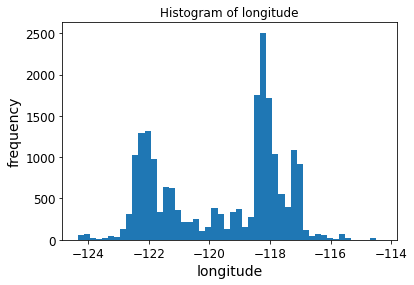

col: latitude


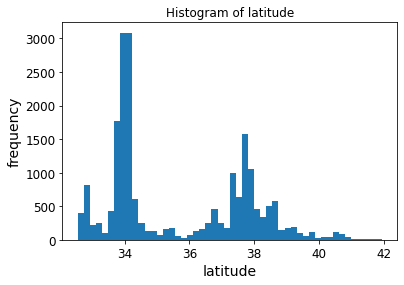

col: housing_median_age


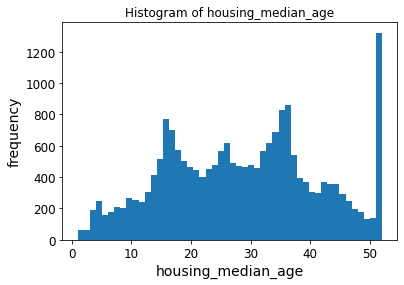

col: total_rooms


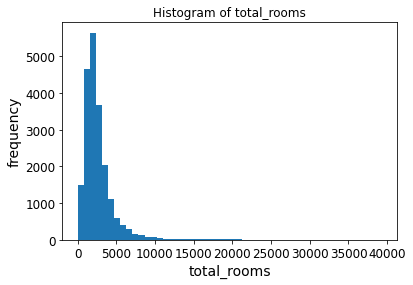

col: total_bedrooms


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


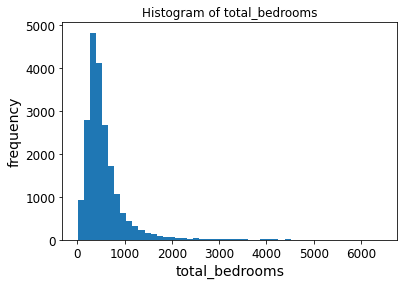

col: population


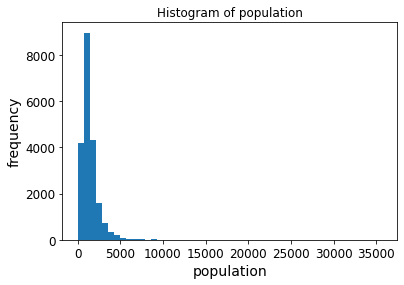

col: households


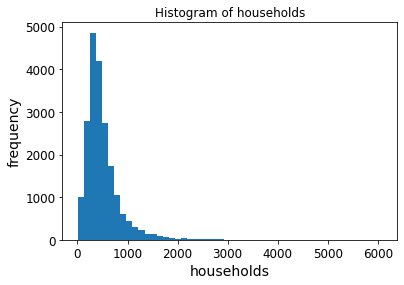

col: median_income


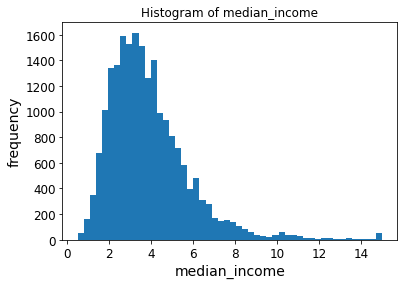

col: median_house_value


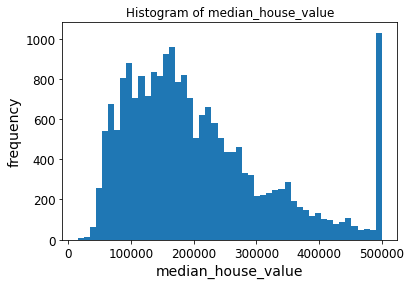

In [61]:
import matplotlib
import matplotlib.pyplot as plt
def plot_histogram(df):  
    bins=50
    col_list = list(housing)
    col_list.remove('ocean_proximity') # text type
    for col in col_list:
        print("col: "+col)
        hist=plt.hist(housing[col], bins=bins)
        plt.title("Histogram of "+col)
        plt.xlabel(col)
        plt.ylabel("frequency")
        plt.show()
plot_histogram(housing)

Let's see the distribution of the data by using __matplotlib__ module briefly.

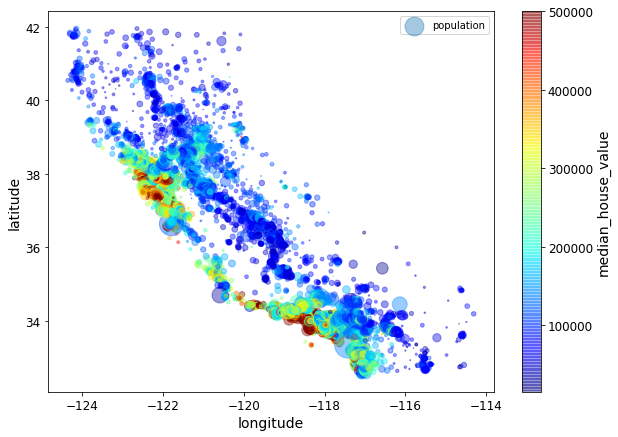

In [62]:
# figures plotting with data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/50, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.legend()

Let's the relationship between features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa564c64fd0>,
      dtype=object)

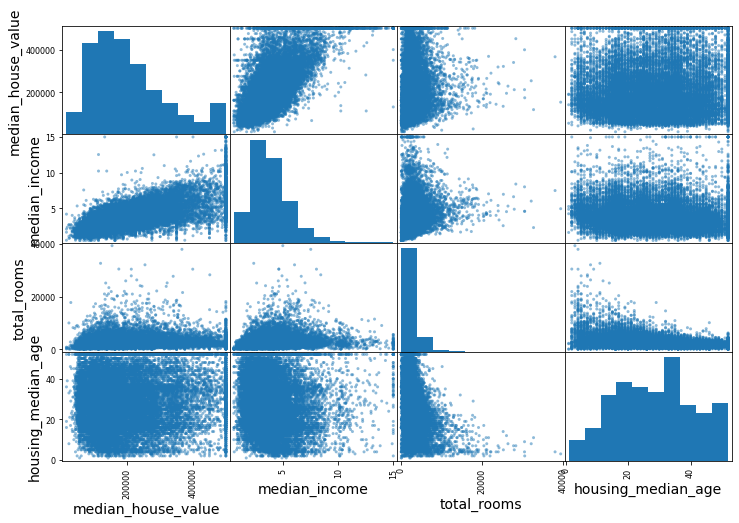

In [64]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Median_income and median_house_value shows a strong relationship.

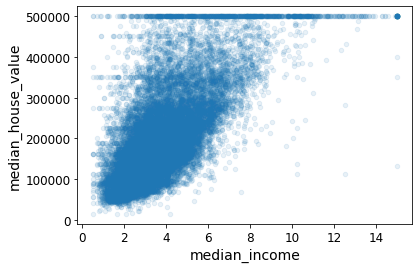

In [65]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

To better understand the characteristics of each feature, let's apply the *info()* method.

In [58]:
# check a structure of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Let’s look at how much each attribute correlates with the *median house value*:

In [59]:
# correlation between the median_house_value and other features
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## 2. Prepare the Data

this step consists of 'pre-processing', 'train-test seperation', and 'feature-label seperation'.

### 2-1) Pre-processing 

#### 2-1.1) Data cleaning
Most Machine Learning algorithms cannot work with missing features, so let’s replace the empty values of 'total_bedrooms' with the median value.

In [63]:
# replace the empty values with the median
median =housing["total_bedrooms"].median()
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median) 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 2-1.2) Attributes combinations
*rooms_per_household* is more meaningful than *total_rooms*. Also, *bedrooms_per_room* is more meaningful than *total_bedrooms*.

In [66]:
# Attributes combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
del housing["total_rooms"], housing["total_bedrooms"]

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   population           20640 non-null  float64
 4   households           20640 non-null  float64
 5   median_income        20640 non-null  float64
 6   median_house_value   20640 non-null  float64
 7   ocean_proximity      20640 non-null  object 
 8   rooms_per_household  20640 non-null  float64
 9   bedrooms_per_room    20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 2-1.3) Feature Scaling
Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.

__Scikit-Learn__ provides a transformer called *StandardScaler* for *standardization*.

In [67]:
# feature standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# delete columns of text type and target variable
col_list = list(housing) 
col_list.remove('ocean_proximity') # text type
col_list.remove('median_house_value') # target variable needs not to be scaled

# generate a new dataframe that consist of numeric type only
housing_numeric = housing[col_list]
housing_scaled = scaler.fit_transform(housing_numeric)
# Data type conversion from 'Series' to 'DataFrame'
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, columns=housing_numeric.columns)

# Concatenate 
housing = pd.concat([housing_scaled_df, housing['median_house_value'], housing['ocean_proximity']], axis=1)
housing.head()

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,NEAR BAY


#### 2-1.4) Handling Text and Categorical Attributes
Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert the 'ocean_proximity' to numbers.

__Pandas__ provides a *get_dummies* method to convert integer categorical values into one-hot vectors. 

In [68]:
# One-hot encoding
housing = pd.get_dummies(housing)
housing.head(10)

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,0,0,0,1,0
5,-1.337818,1.038503,1.856182,-0.894071,-0.801787,0.087447,-0.269730,0.275563,269700.0,0,0,0,1,0
6,-1.337818,1.033821,1.856182,-0.292712,0.037823,-0.111366,-0.200918,-0.320242,299200.0,0,0,0,1,0
7,-1.337818,1.033821,1.856182,-0.237079,0.385698,-0.395137,-0.255232,0.115458,241400.0,0,0,0,1,0
8,-1.342809,1.033821,1.061601,-0.193810,0.249687,-0.942359,-0.458703,0.712372,226700.0,0,0,0,1,0
9,-1.337818,1.033821,1.856182,0.110844,0.560944,-0.094470,-0.185283,-0.223507,261100.0,0,0,0,1,0


### 2-2) Training and Test Set Seperation
__Scikit-Learn__ provides *train_test_split* function to split dataset into multiple subsets in various ways. 

In [69]:
# training - test seperation
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print('# of train_set : %.0f, # of test_set : %.0f' %(train_set.shape[0], test_set.shape[0]))

# of train_set : 16512, # of test_set : 4128


### 2-3) Features and Target Value Seperation of the Training Set
It’s time to prepare the data for your Machine Learning algorithms. 

Let’s separate the features and target value to generate the model H(X).

In [70]:
# feature and label seperation of training set
train_set_features = train_set.drop('median_house_value',axis=1)
train_set_target = train_set["median_house_value"].copy()

## 3. Linear Regression
generate the linear regression model by using *LinearRegression* function from __Scikit-learn__.

For calculating our RMSE, *mean_square_error* function will be used from __scikit-learn__. Also, __numpy__ module will be used to use sqaure-root operation.

 $$RMSE = \sqrt{\sum{(y - \widehat y)^2}\over N}$$
 <br/>
 
$y$ : actual median_house_value, $\widehat y$ : median_house_value predicted. $N$ : total number of data<br/>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np # for a sqaure root calcuation

# generate model by using training set
lin_reg = LinearRegression()
lin_reg.fit(train_set_features, train_set_target) 

# Feature and target value Seperation of the test set
test_set_features = test_set.drop('median_house_value',axis=1)
test_set_target = test_set["median_house_value"].copy()

# target value predicted from our model
final_model = lin_reg
final_predictions = final_model.predict(test_set_features)

# RMSE
final_mse = mean_squared_error(test_set_target, final_predictions)
final_rmse = np.sqrt(final_mse)

print('final_linear_RMSE : %.2f' %final_rmse)

final_linear_RMSE : 72337.41


## 4. Ridge Regression
__scikit-learn__ provides *Ridge* function and *cross_val_score* function to calculate a cross-validation.

C:\Users\dlsgm\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.568018e-17
  overwrite_a=True).T
C:\Users\dlsgm\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.758235e-17
  overwrite_a=True).T
C:\Users\dlsgm\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.669262e-17
  overwrite_a=True).T


Best alpha : 0.800000
final_ridge_RMSE : 72343.86


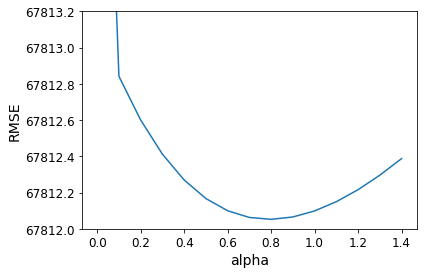

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# a function defined to calculate the RMSE with 5-fold cross-validation.
def mean_cv_rmse(model):
    rmse= np.sqrt(-cross_val_score(model, train_set_features, 
                                   train_set_target, scoring="neg_mean_squared_error", cv = 5))
    return(rmse.mean())

# find best alpha
alpha_range = np.arange(0, 1.5, 0.1)
cv_ridge = [mean_cv_rmse(Ridge(alpha = alpha_value)) for alpha_value in alpha_range]
cv_ridge = pd.Series(cv_ridge, index=alpha_range)
ridge_best_alpha = cv_ridge.idxmin()
print("Best alpha : %f" % (ridge_best_alpha))

# plot the RMSE curve according to alpha value
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(alpha_range, cv_ridge)
ax1.set_ylim(67812, 67813.2)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax1.yaxis.set_major_formatter(y_formatter)
plt.xlabel("alpha")
plt.ylabel("RMSE")

# ridge regression
model_ridge = Ridge(alpha = ridge_best_alpha)
model_ridge.fit(train_set_features, train_set_target)

# ridge RMSE
ridge_predicted = model_ridge.predict(test_set_features)
final_ridge_mse = mean_squared_error(test_set_target, ridge_predicted)
final_ridge_rmse = np.sqrt(final_ridge_mse)
print('final_ridge_RMSE : %.2f' %final_ridge_rmse)

# command to hide the warning box
import warnings
warnings.filterwarnings(action = 'ignore')

## 5. Lasso Regression

Best alpha : 1.200000
final_ridge_RMSE : 72338.06


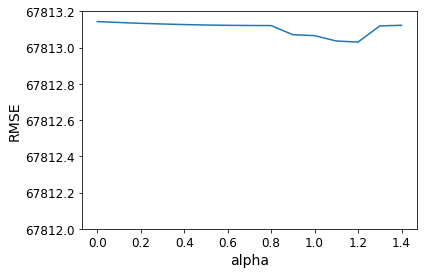

In [ ]:
########### To do : fill in the box with your Lasso code. ###############
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# a function defined to calculate the RMSE with 5-fold cross-validation.
def mean_cv_rmse(model):
    rmse= np.sqrt(-cross_val_score(model, train_set_features, 
                                   train_set_target, scoring="neg_mean_squared_error", cv = 5))
    return(rmse.mean())

# find best alpha
alpha_range = np.arange(0, 1.5, 0.1)
cv_lasso = [mean_cv_rmse(Lasso(alpha = alpha_value)) for alpha_value in alpha_range]
cv_lasso = pd.Series(cv_lasso, index=alpha_range)
ridge_best_alpha = cv_lasso.idxmin()
print("Best alpha : %f" % (ridge_best_alpha))

# plot the RMSE curve according to alpha value
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(alpha_range, cv_lasso)
ax1.set_ylim(67812, 67813.2)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax1.yaxis.set_major_formatter(y_formatter)
plt.xlabel("alpha")
plt.ylabel("RMSE")

# ridge regression
model_lasso = Lasso(alpha = ridge_best_alpha)
model_lasso.fit(train_set_features, train_set_target)

# ridge RMSE
lasso_predicted = model_lasso.predict(test_set_features)
final_lasso_mse = mean_squared_error(test_set_target, lasso_predicted)
final_lasso_rmse = np.sqrt(final_lasso_mse)
print('final_ridge_RMSE : %.2f' %final_lasso_rmse)

# command to hide the warning box
import warnings
warnings.filterwarnings(action = 'ignore')

